# Imports

In [132]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde as kde
%load_ext autoreload
%autoreload 2
%matplotlib inline
np.set_printoptions(edgeitems=10, linewidth=120, suppress=True, precision=12)

from pertussis import *
logger.setLevel(logging.INFO)
plt.rcParams['figure.figsize'] = (16,9)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Single Chain

In [2]:
# save_mcmc(mcmc, './chains/0729-8k.pkl')

## Load Model

mcmc_0: 1005
['phi', 'f1', 'f2', 'f3']
MLE: -71.26 at 766 with values: 
 [ 1.477419919846  0.000932974065  0.000397906114  0.000073889509]


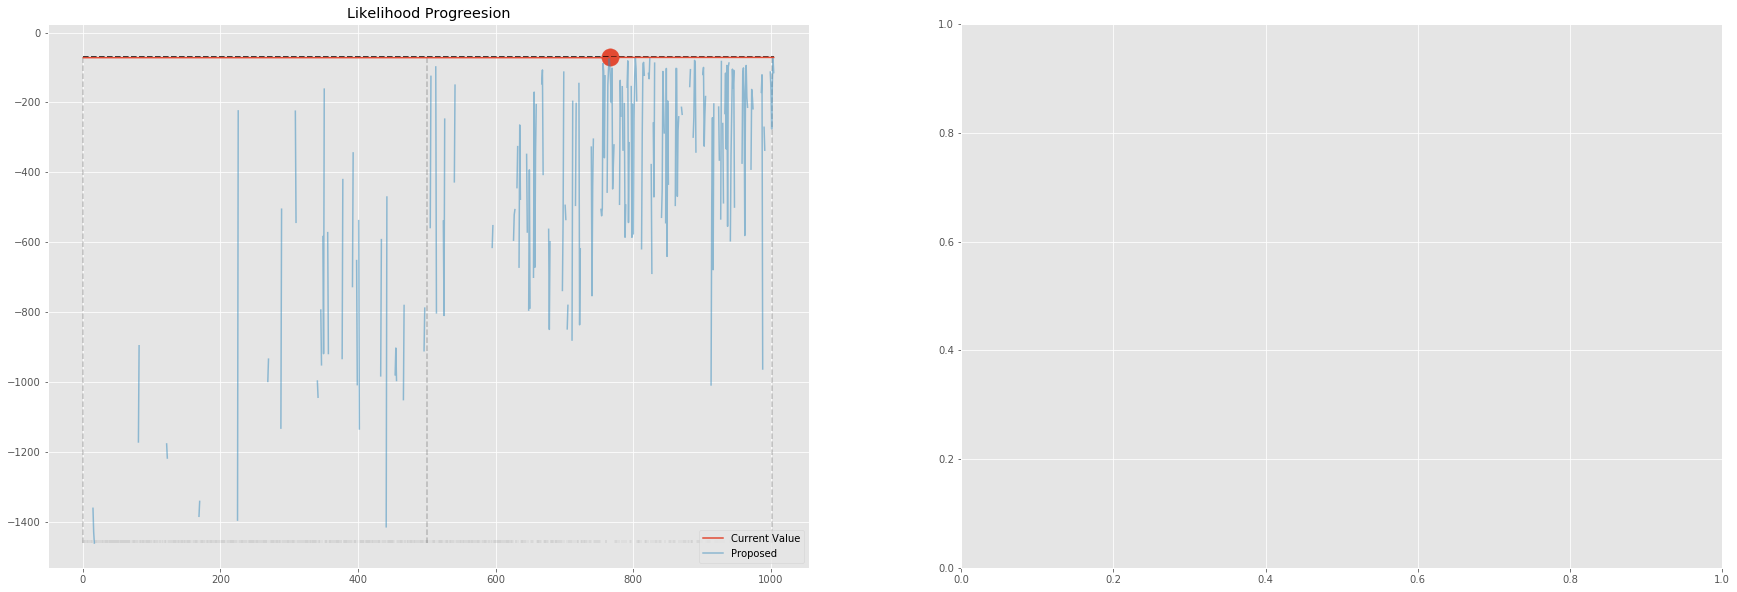

In [176]:
# Load
# mcmc = load_mcmc('./chains/mcmc_0.pkl')
mcmc = load_mcmc('./mcmc_0.pkl')

print ('{}: {}'.format(mcmc['name'], len(mcmc['chain'])))
names = [mcmc['names'][i] for i in mcmc['active_params']]
print(names)

# Distributions
dists = mcmc['dists']
# Times
r_start = mcmc['start']
r_end = mcmc['end']
step = 1 / N

# Data
data_M, months = mcmc['datax'], mcmc['datay']
state_0 = mcmc['state_0']

# Results
ll = chain_ll(mcmc)

#PLOT
fig, axs = plt.subplots(1,2,figsize=(30,10))
likelihood_progression(mcmc, ax=axs[0])
# likelihood_progression(mcmc, zoom=40, ax=axs[1])
plt.show()

## Summary
difference between LL for following runs

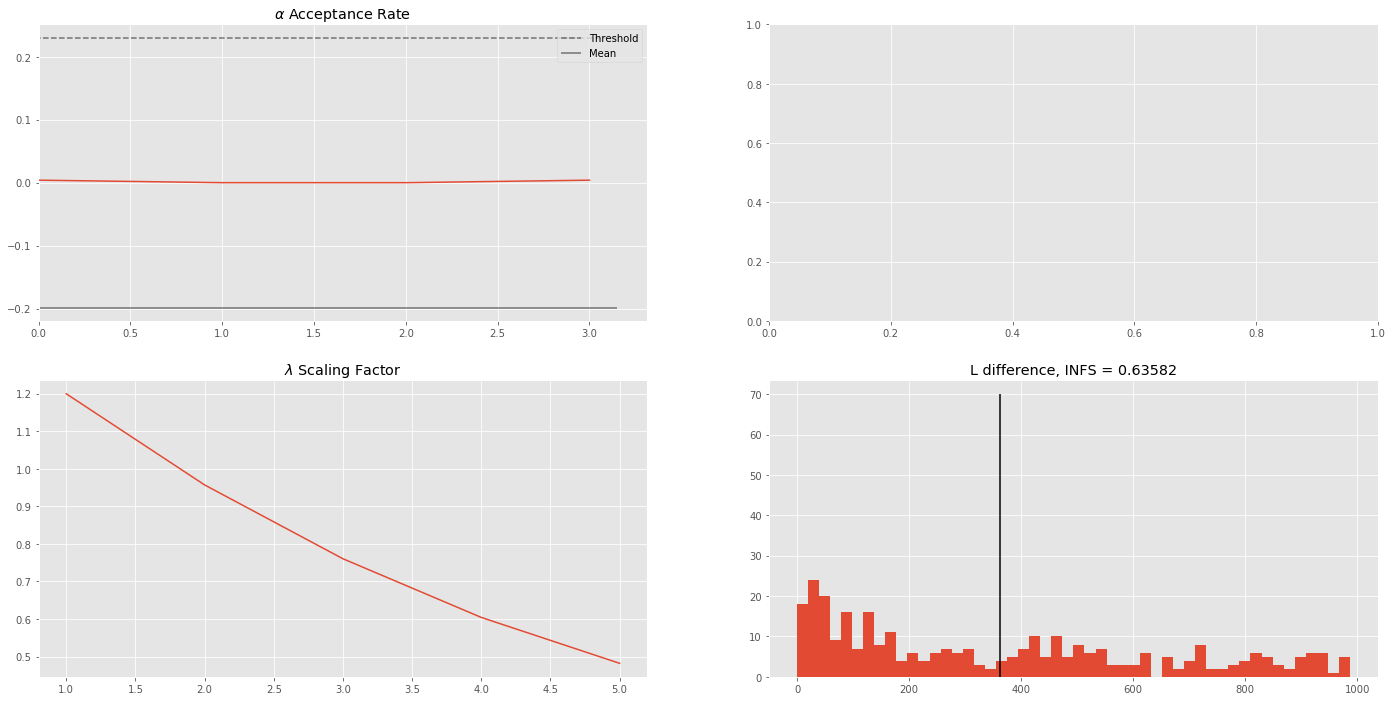

In [177]:
chain_summary(mcmc)

Compare likelihood in the neighbourhood of the MLE

## Traces
### Chains

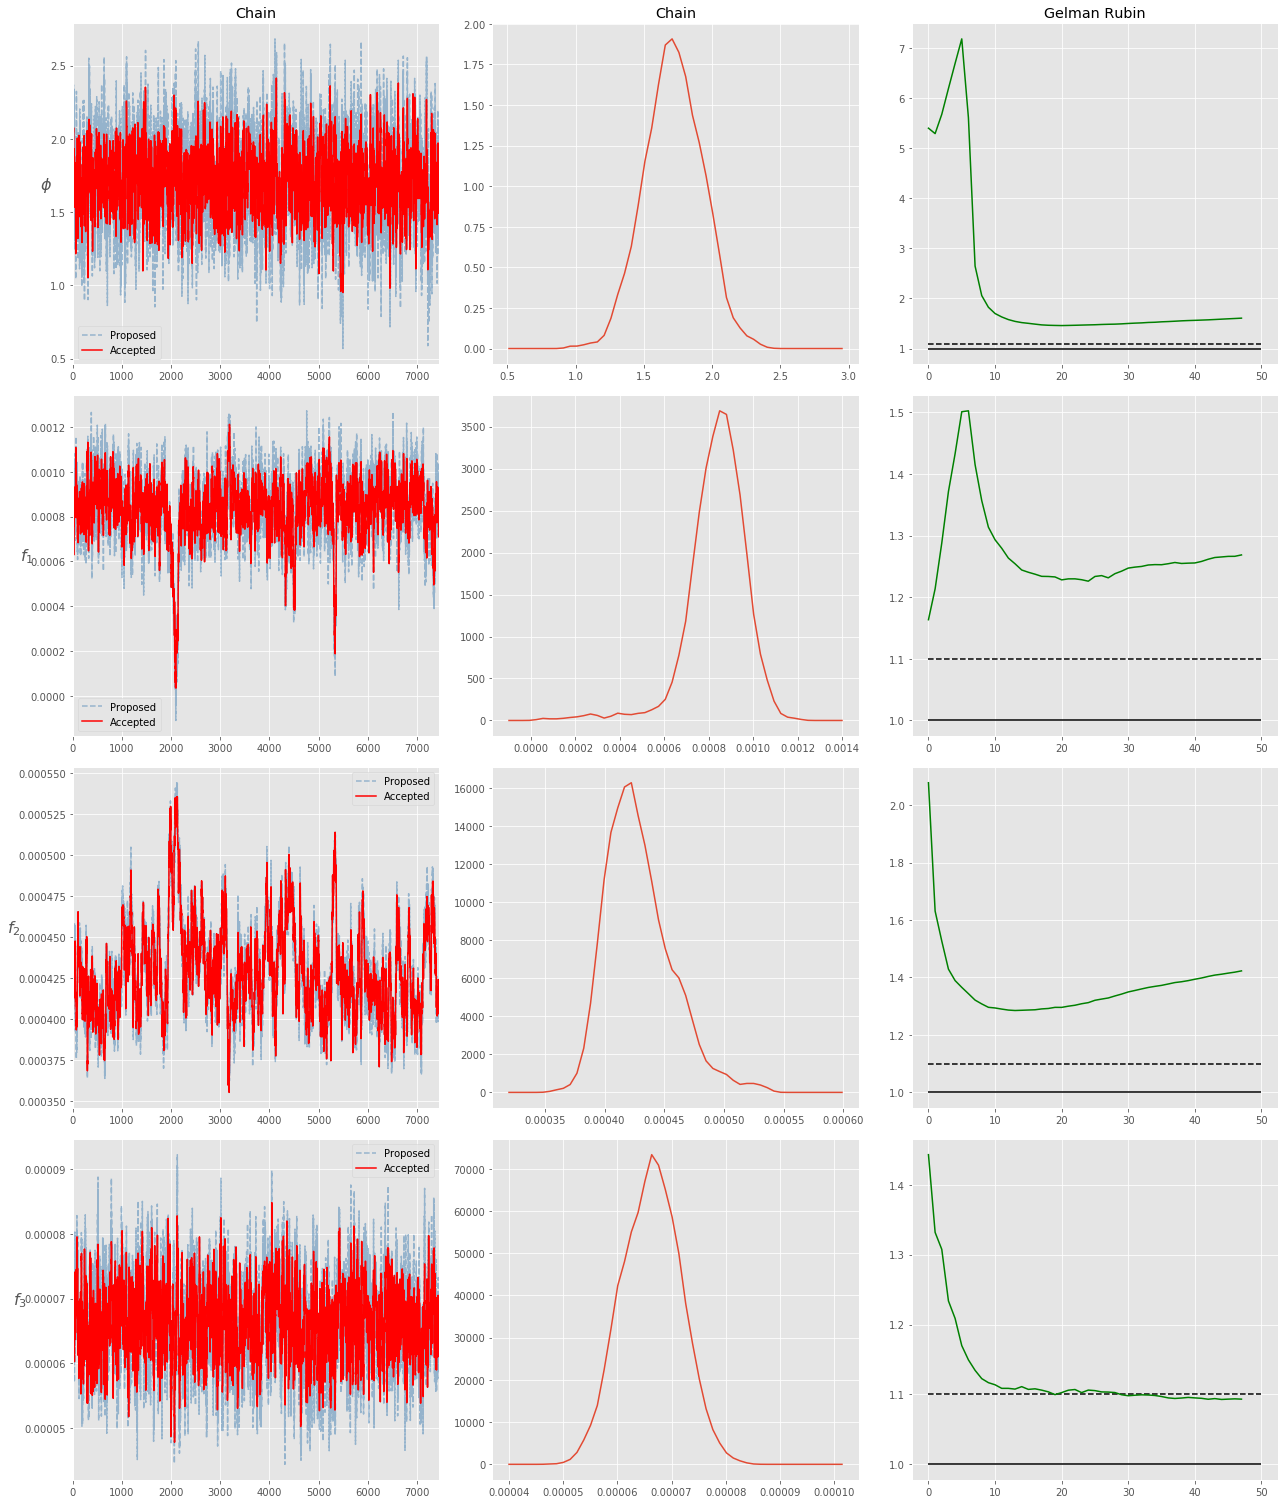

In [21]:
chain_tally(mcmc,5000)
plot_chains(mcmc, plot_gr = True)
plt.show()

### For PPT

#### Chains

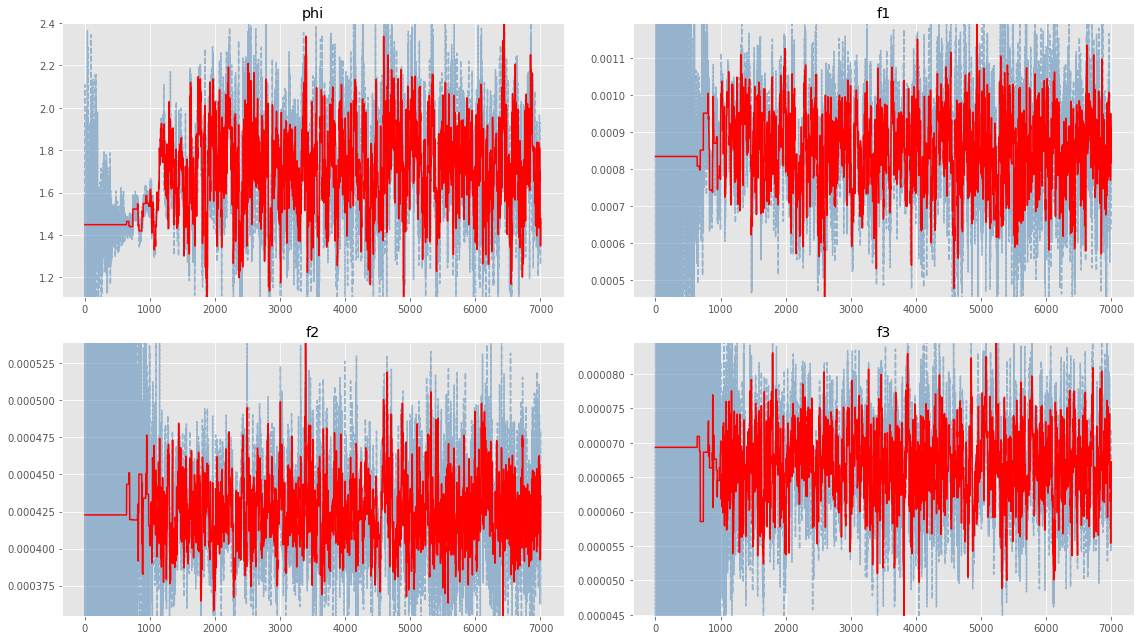

In [26]:
fig, axs = plt.subplots(2,2, figsize=(16,9))
axs = np.concatenate(axs)
tally = 0#-12500
mcmc = mcmc
chain = mcmc['chain'][tally:,:]
guesses = mcmc['guesses'][tally:,:]
# names = ["omega", "phi", "rho", "f1"]#,"f2","f3","e"]
for i, name in enumerate(names):
    ch = chain[:,i]
#     print (ch)
    a,b = dists[i].args
    a, b = a,a+b
    a,b = min(ch), max(ch)
    axs[i].plot(guesses[:,i], color='steelblue', ls='--', alpha=0.5)
    axs[i].plot(chain[:,i], color='red')#, label = 'chain {}'.format(j))

    axs[i].set_title(name)
    axs[i].set_ylim(a,b)
#     density = kde(chain[:,i])
#     xs = np.linspace(a,b,50)
#     axs[i,1].plot(xs,density(xs))
# ax = axs[-1]
# ax.imshow(cov_mat, cmap='YlOrRd')
# ax.imshow(cov_mat, cmap='seismic')
# ax.set_yticks([])
# ax.set_xticks([])
plt.tight_layout()
plt.show()

#### Distributions


In [28]:
del (chain)

[-1.  0.  1.  2.  3.  4.]


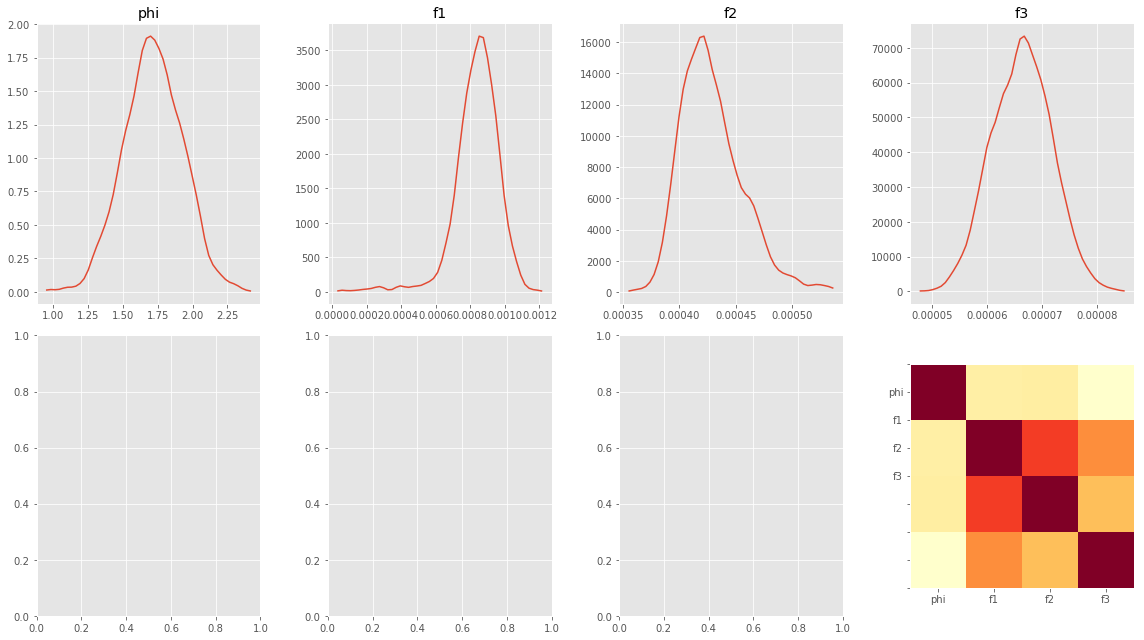

In [30]:
tally = mcmc['tally']
chain = mcmc['chain'][tally:,:]
guesses = mcmc['guesses'][tally:,:]
cov_mat = np.corrcoef(chain[-1000:,:].T,)
fig, axs = plt.subplots(2,4, figsize=(16,9))
axs = np.concatenate(axs)



for i, name in enumerate(names):
#     if i==2: continue
    ch = chain[:,i]
    a,b = dists[i].args
    a, b = a,a+b
    a,b = min(ch), max(ch)
    axs[i].set_title(name)
    
    density = kde(chain[:,i])
    xs = np.linspace(a,b,50)
    axs[i].plot(xs,density(xs))
ax = axs[-1]
ax.imshow(np.abs(cov_mat), cmap='YlOrRd')
# ax.imshow(cov_mat, cmap='seismic')
# ax.set_yticks([])
(np.arange(len(names)))
ax.set_xticklabels([""]+names)
ax.set_yticklabels([""]+names)
ax.grid(False)
print (ax.get_xticks())
plt.tight_layout()
plt.show()

In [107]:
cov_mat

array([[ 1.    , -0.3838,  0.1702, -0.0208, -0.0579],
       [-0.3838,  1.    , -0.1242, -0.1541, -0.0181],
       [ 0.1702, -0.1242,  1.    , -0.4734, -0.1387],
       [-0.0208, -0.1541, -0.4734,  1.    , -0.1804],
       [-0.0579, -0.0181, -0.1387, -0.1804,  1.    ]])

# Multiple Chain
## Load Models

In [220]:
# save_vers = '1031-4-chains'
# [save_mcmc(mc, './chains/' + save_vers) for mc in mcmcs ]
# ;

''

./
mcmc_0 - MLE: -72.00 at 1 with values: 
 [ 1.45     0.0008   0.0004   0.00007]
mcmc_1 - MLE: -133.01 at 127 with values: 
 [ 2.967583123582  0.001165538412  0.000510559283  0.000096755251]
205


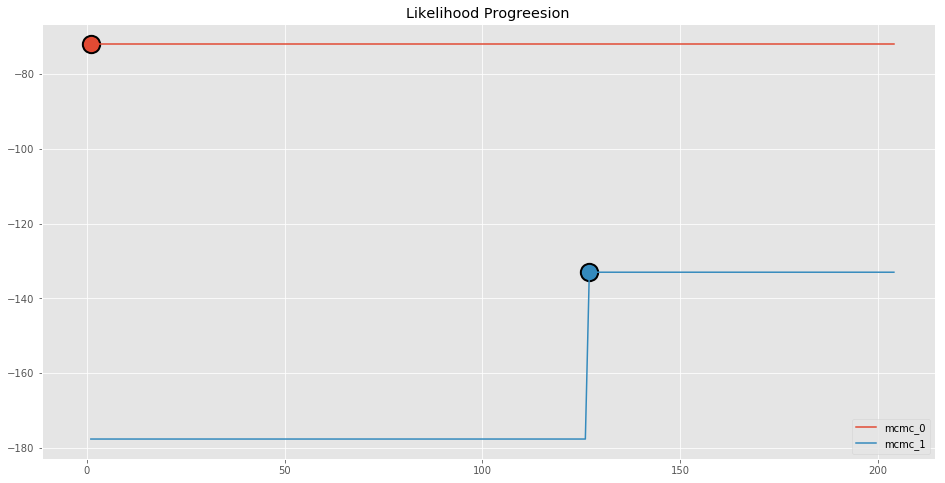

In [227]:
vers = 'chains/1031-4-chains'
vers = ''
print ('./' + vers)
mcmcs = [load_mcmc('./' + vers + 'mcmc_{}.pkl'.format(i)) for i in [0,1]]
for mc in mcmcs:
    chain_tally(mc, 0)
# mcmcs[1]['active'] = False
# mcmcs[3]['active'] = False
fig, ax = likelihood_progression_multi(mcmcs)
print(len(mcmcs[0]['accepted']))
# ax.set_xlim(left=9000)
# ax.set_ylim(bottom=-80)

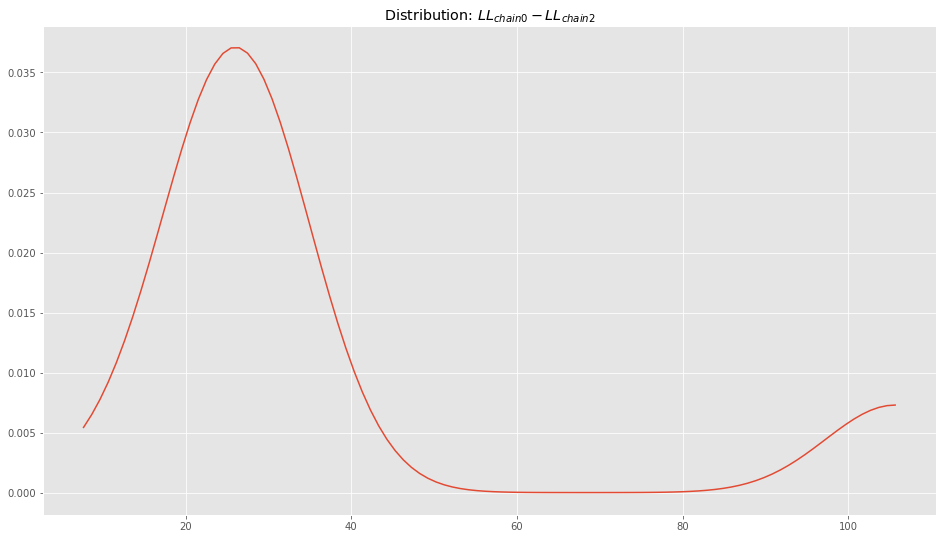

In [173]:
lldiff = mcmcs[0]['ll'][-500:,0] - mcmcs[1]['ll'][-500:,0]
fig, ax = plt.subplots()
density = kde(lldiff)
xs = np.linspace(lldiff.min(), lldiff.max(), 100)
ax.plot(xs, density(xs))
ax.set_title("Distribution: $LL_{{chain0}} - LL_{{chain2}}$")

In [193]:
print (gelman_rubin(make_chains([mcmcs[0],mcmcs[3]])))
print (gelman_rubin(make_chains([mcmcs[1],mcmcs[2]])))

[ 1.088528193514  1.048158183174  1.039459477365  1.052483510395]
[ 1.252030624229  1.043250805182  1.022750890411  1.001931980075]


## Chains and Distributions

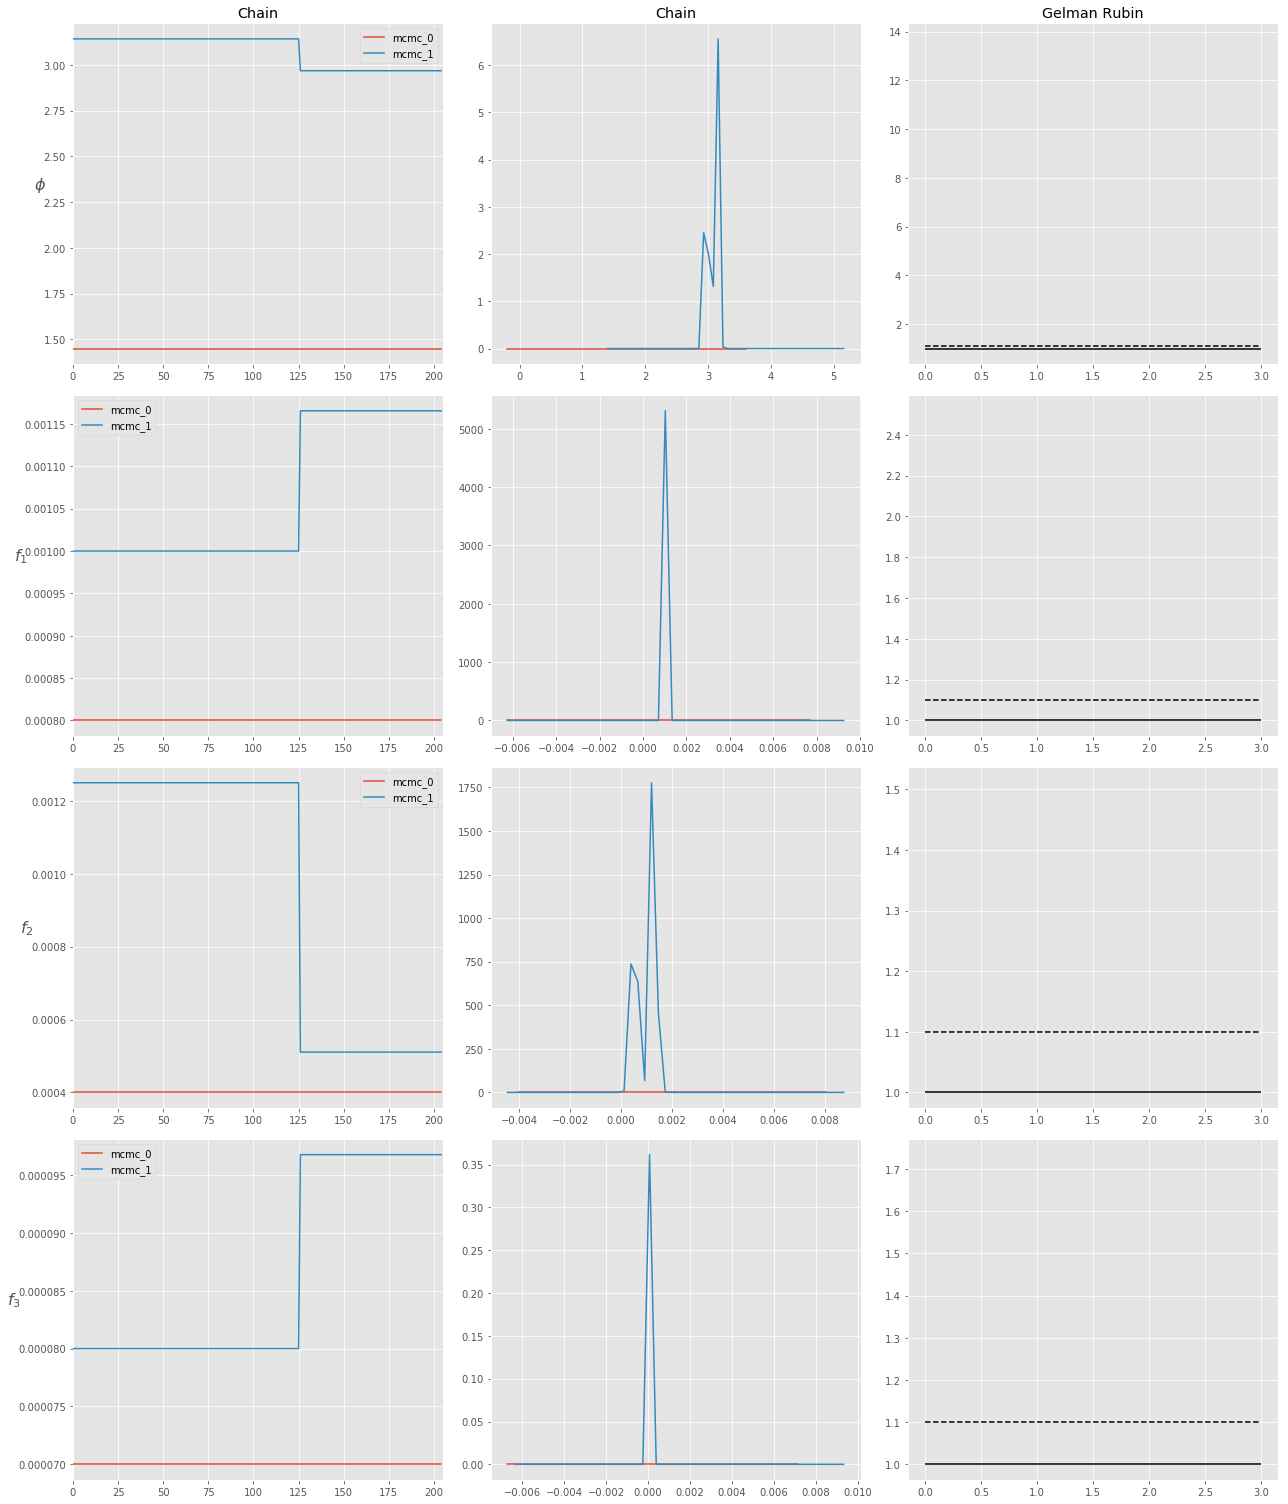

In [228]:

# for mc in mcmcs: chain_tally(mc, -2000)
fig, axs = plot_chains(mcmcs[0], plot_gr = True, multi_chain = True)
for mc in mcmcs[1:]:
    plot_chains(mc, fig = fig, multi_chain = True)

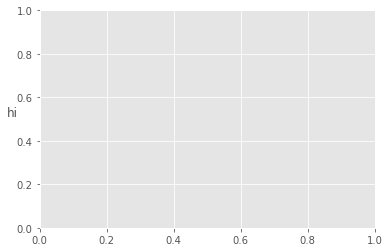

In [14]:
fig, ax = plt.subplots(1)
ax.set_ylabel('hi',  rotation=0)
# fig.get_axes()

# Likelihood Analysis
See a chart of to lines for two models, with data scatterd

In [244]:
np.set_printoptions(edgeitems=10, linewidth=120, suppress=True, precision=6)

## MLE Comparison

In [32]:
mcmc=mcmcs[0]
mle, mle_place, min_le = mle_values(mcmc, True)

best_vals = mcmc['chain'][mle_place,:]
print (best_vals)

# cest_vals = mcmc['guesses'][mle_place+1,:]
# print (best_vals)
bvals = best_vals.copy() #3.9287725897700483
# cvals = best_vals.copy()
# cvals[0] = cest_vals[0] 
# cvals[1] = cest_vals[1] 
# cvals[2] = cest_vals[2] 
# cvals[3] = cest_vals[3] 
# cvals[4] = cest_vals[4] 
# cvals[5] = cest_vals[5] 
# cvals[6] = cest_vals[6] 
g = np.ones(7)
g[mcmc['active_params']] = best_vals

print (g)
sl150 = np.append(np.arange(112), np.arange(116,192))
# print(vals)
zb, _ = run_model(state_0,r_start,r_end,*g)
# zc, _ = run_model(state_0,r_start,r_end,*cvals)
print ((bvals), log_liklihood(zb, data_M, mcmc['sigma']))
# print ((cvals), log_liklihood(zc, data_M, mcmc['sigma']))
# print (bvals/cvals)
# print(z[:10,:10])
###### Draw Figure 4####
# colors = 
fig, axs = plt.subplots(1, 2, figsize=(16, 9))
labels = ['0-1', '1-21', '21+']
ax = axs[0]
for i, l in enumerate(labels):
    if i >=3:
        continue
    ax.plot(months, zb[i, :], label=l, color='C{}'.format(i))
#     ax.plot(months, zc[i, :], label=l, linestyle='--', color='C{}'.format(i))
    ax.scatter(months[data_M[i,:]<150], data_M[i, :][data_M[i,:]<150])
ax.legend()
ax.set_ylabel("Cases per $10^5$")
ax.set_xlabel("Year")
ax.set_title("LL: {}".format(log_liklihood(zb, data_M, mcmc['sigma'])))
ax = axs[1]
ax.plot(months, zb.sum(axis=0), color='grey')
# ax.plot(months, zc.sum(axis=0), color='grey', linestyle= '--')
ax.scatter(months[sl150], data_M.sum(axis=0)[sl150], c='grey')
ax.set_ylim
ax.set_xlabel("Year")

plt.show()

[ 1.6532  0.0008  0.0004  0.0001]
[ 1.      1.6532  1.      0.0008  0.0004  0.0001  1.    ]


NameError: name 'state_0' is not defined

In [245]:
t1 = data_M.mean(axis=1)
# np.vstack()
zb = np.repeat(t1, 192,axis=0).reshape(3,192)
print ((bvals), log_liklihood(zb, data_M, mcmc['sigma']))
fig, axs = plt.subplots(1, 2, figsize=(16, 9))
labels = ['0-1', '1-21', '21+']
ax = axs[0]
for i, l in enumerate(labels):
    if i >=3:
        continue
    ax.plot(months, zb[i, :], label=l, color='C{}'.format(i))
#     ax.plot(months, zc[i, :], label=l, linestyle='--', color='C{}'.format(i))
    ax.scatter(months, data_M[i, :])
ax.legend()
ax.set_title("LL: {}".format(log_liklihood(zb, data_M, mcmc['sigma'])))
ax.set_ylabel("Cases per $10^5$")
ax.set_xlabel("Year")
ax = axs[1]
ax.plot(months, zb.mean(axis=0), color='grey')
# ax.plot(months, zc.sum(axis=0), color='grey', linestyle= '--')
ax.scatter(months[sl150], data_M.sum(axis=0)[sl150], c='grey')
ax.set_ylim
ax.set_xlabel("Year")

plt.show()

NameError: name 'bvals' is not defined

In [87]:
mcmc['chain'][-100,:]

array([  3.7392,   1.3714,  61.3438,   0.0006,   0.0004,   0.0001])

In [88]:
mcmc['ll'][-100,:]

array([-88.818 , -88.8338])

## Likelihood Cloud

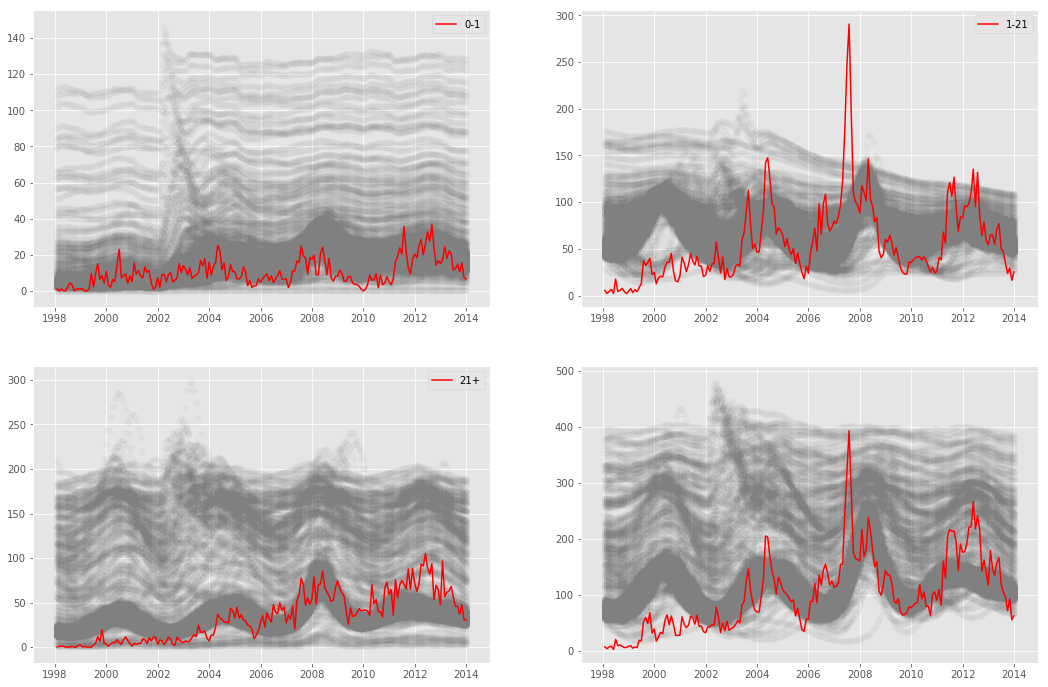

In [36]:
fig, axs = plt.subplots(2, 2, figsize=(18, 12))
axs = np.hstack(axs)
labels = ['0-1', '1-21', '21+']
from_place = mle_place
for j in np.arange(-1000,1000):
    chain_place = from_place + j
#     curr_vals = mcmc['guesses'][chain_place, :]
#     curr_model,_ = run_model(state_0,r_start,r_end,*curr_vals)
#     print(mcmc['accepted'][chain_place],end=' ')
    if mcmc['accepted'][chain_place] == 0: continue
    curr_model = mcmc['y_hat_M'][j,:,:]
    for i, l in enumerate(labels):
        ax = axs[i]
        if i >=3:
            continue
        ax.scatter(months, curr_model[i, :], color='grey', alpha=0.051)
        

    ax = axs[3]
    ax.scatter(months, curr_model.sum(axis=0), color='grey', alpha=0.0511)

# ax.set_ylim

for i, l in enumerate(labels):
    ax = axs[i]
    ax.plot(months, data_M[i, :], color='red', label=l)
    ax.legend()
ax = axs[3]
ax.plot(months, data_M.sum(axis=0), c='red')
plt.show()

In [74]:
np.any(mcmc['y_hat_M'][j,:,:]>400)

False

NameError: name 'mle_place' is not defined

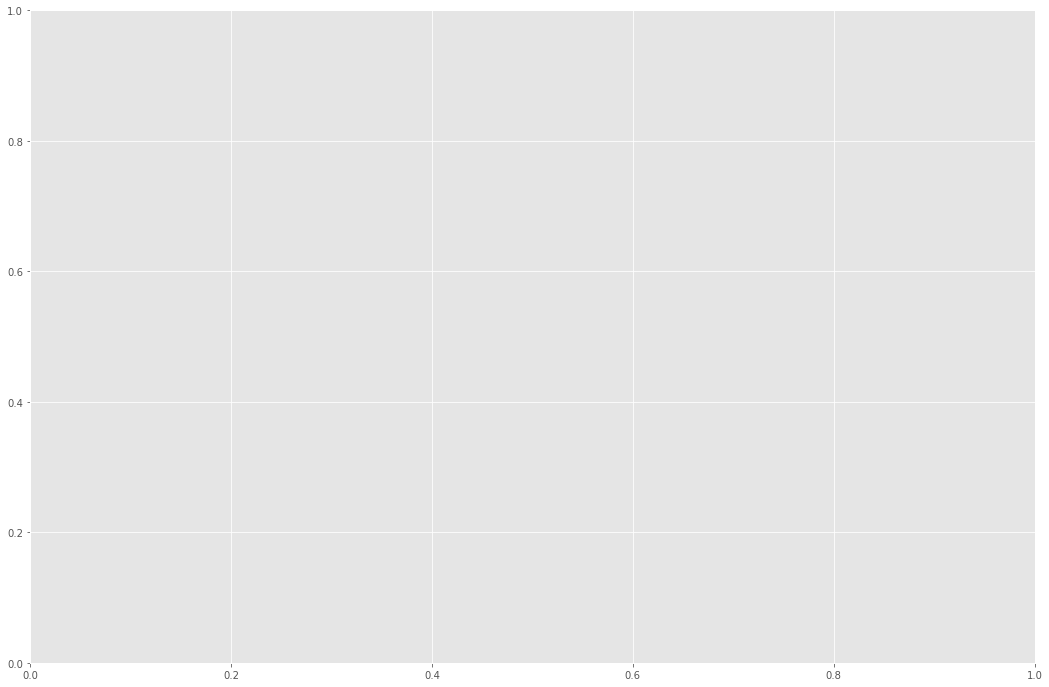

In [27]:
fig, axs = plt.subplots(1, figsize=(18, 12))
# axs = np.hstack(axs)
# labels = ['0-1', '1-21', '21+']
from_place = mle_place
# from_place = 0
# for j in np.arange(-1500,1500):
for j in np.arange(-1000,0):
    chain_place = from_place + j
    if mcmc['accepted'][chain_place] == 0: continue
#     if np.any(mcmc['y_hat_M'][chain_place,:,:] > 400): continue    
    curr_model = mcmc['y_hat_M'][chain_place,:,:]
    ax = axs
    ax.plot(months, curr_model.sum(axis=0), color='grey', alpha=0.05)
ax.scatter(months, data_M.sum(axis=0), c='red', zorder=5)
ax.set_ylabel("Cases per $10^5$")
ax.set_xlim(1998,2014)
ax.set_ylim(bottom=0)
plt.show()

In [ ]:
# for ppt
fig, axs = plt.subplots(1, figsize=(16, 9))
# axs = np.hstack(axs)
# labels = ['0-1', '1-21', '21+']
from_place = mle_place
# from_place = 0
for j in np.arange(-600,600):
# for j in np.arange(36999):
    chain_place = from_place + j
#     if mcmc['accepted'][chain_place] == 0: continue
#     if np.any(mcmc['y_hat_M'][chain_place,:,:] > 400): continue    
    curr_model = mcmc['y_hat_M'][chain_place,:,:]
    ax = axs
    ax.plot(months, curr_model.sum(axis=0), color='grey', alpha=0.02)
ax.scatter(months, data_M.sum(axis=0), c='red', zorder=5)
ax.set_ylabel("Cases per $10^5$")
ax.set_xlim(1998,2014)
ax.set_ylim(bottom=0)
plt.show()

### For PPT

In [40]:
###### FOR PPT
best_vals = mcmc['guesses'][mle_place,:]

# print (best_vals)
bvals = best_vals.copy() #3.9287725897700483

# print(vals)
zb, _ = run_model(state_0,r_start,r_end,*bvals)

print ((bvals), log_liklihood(zb, data_M, mcmc['sigma']))

print (bvals/cvals)
# print(z[:10,:10])
###### Draw Figure 4####
# colors = 

fig, axs = plt.subplots(1, 2, figsize=(16, 9))
labels = ['0-1', '1-21', '21+']
ax = axs[0]
for i, l in enumerate(labels):
    if i >=3:
        continue
    ax.plot(months, zb[i, :], label=l, color='C{}'.format(i))
    ax.scatter(months, data_M[i, :])
ax.legend()
ax.set_ylabel("Cases per $10^5$")
ax.set_xlabel("Year")


ax = axs[1]
from_place = mle_place
for j in np.arange(-600,600):
    chain_place = from_place + j
    curr_model = mcmc['y_hat_M'][chain_place,:,:]
    ax.plot(months, curr_model.sum(axis=0), color='grey', alpha=0.02)
ax.scatter(months, data_M.sum(axis=0), c='k',zorder=5)
ax.set_ylabel("Cases per $10^5$")
ax.set_xlim(1998,2014)
ax.set_ylim(bottom=0)
# ax.plot(months, zb.sum(axis=0), color='grey')
# # ax.plot(months, zc.sum(axis=0), color='grey', linestyle= '--')
# ax.scatter(months, data_M.sum(axis=0), c='grey')
# ax.set_ylim
# ax.set_xlabel("Year")

plt.show()

[ 4.3342  0.8495  1.5069  0.0243  0.0049  0.0016] -240.426033955


NameError: name 'cvals' is not defined

In [38]:
# for k,v in mcmc.items():
#     if k in ['chain','monthly', 'y_now_M', 'y_hat_M', 'guesses', 'datax','datay']:
#         continue
#     print (k,'\n',v,'\n\n\n')
# print (mcmc['accepted'].size)

In [ ]:
(B(tst, tst1, np.pi) == B(tst, tst1, np.pi).max()).sum()

In [90]:
# mcmc['y_hat_M'][mle_place,:,:]

# PAPER

## A
Image of Model compartments

## B

## C Cloud

2926


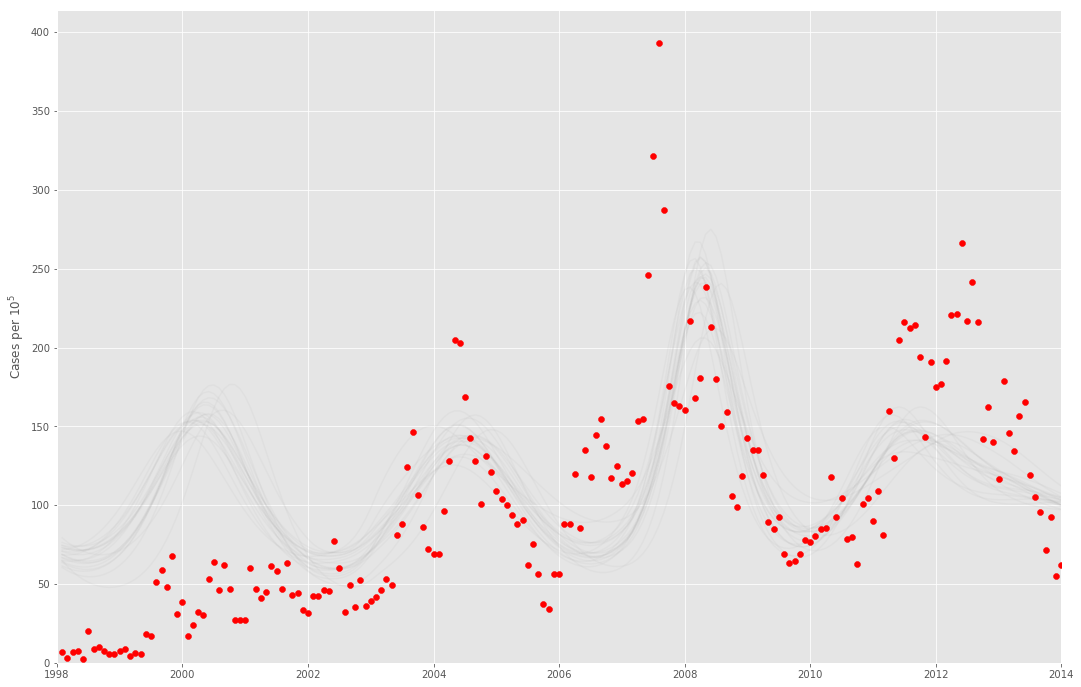

In [16]:
fig, axs = plt.subplots(1, figsize=(18, 12))
# axs = np.hstack(axs)
# labels = ['0-1', '1-21', '21+']
from_place = mle_place
print (from_place)
# for j in np.arange(-1500,1500):
for j in np.arange(0,20):
    chain_place = from_place + j
#     if mcmc['accepted'][chain_place] == 0: continue
#     if np.any(mcmc['y_hat_M'][chain_place,:,:] > 400): continue    
    curr_model = mcmc['y_hat_M'][chain_place,:,:]
    ax = axs
    ax.plot(months, curr_model.sum(axis=0), color='grey', alpha=0.05)
ax.scatter(months, data_M.sum(axis=0), c='red', zorder=5)
ax.set_ylabel("Cases per $10^5$")
ax.set_xlim(1998,2014)
ax.set_ylim(bottom=0)
plt.show()

## D Bars

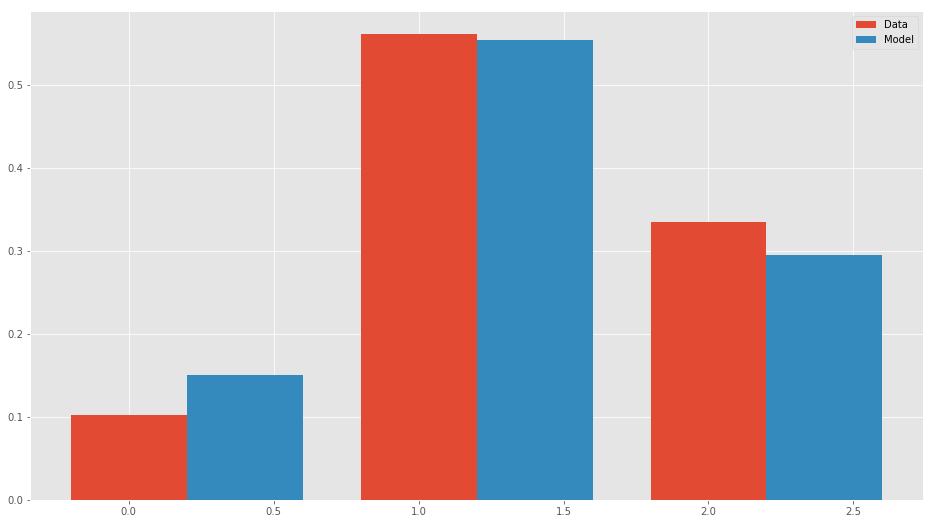

In [249]:
data_age_dist = data_M.sum(axis=1)
data_age_dist /= data_age_dist.sum()

y_age_dist = mcmc['y_hat_M'][mle_place,:,:].sum(axis=1)
y_age_dist /= y_age_dist.sum()

x = np.arange(len(data_age_dist))
fig, ax = plt.subplots(figsize=(16,9))
# https://matplotlib.org/2.0.0/examples/api/barchart_demo.html
width = 0.4
ax.bar(x,data_age_dist, width, label="Data")
ax.bar(x+width, y_age_dist, width, label="Model")

ax.legend()

# Best Values 


In [52]:
# Parameters
state_0 = mcmc['state_0']

# sys.exit("After collect state 0")
###################################################################################################################
#########################                            Run                         ##################################
###################################################################################################################

# Parameters

# om, phi, rho, f1, f2, f3, e = best_vals
om, phi, e = 0,0,1
rho, f1,f2,f3 = best_vals
f = np.concatenate((nums(f1, sc[0]), nums(f2, sc[1]), nums(f3, sc[2])))
print('***Initial Params***')
print(om, phi, rho, f1, f2, f3, e)
# Solve system
clk = clock()
years_prior = 10
y_0 = difference_model(state_0, r_start - years_prior, r_start,
                       rho, om, phi, f, e,
                       r=20, full_output=True)
print(y_0[3].shape)
state_0 = [yi[:, -1] for yi in y_0]

r = 3
y = difference_model(state_0, r_start, r_end+10,
                     rho, om, phi, f, e,
                     r=r, full_output=True)

print("TIME: ", clock() - clk)

***Initial Params***
0 0 20.5182686249 0.00159387902712 0.000805945090712 0.000179879441059 1
(27, 2400)
TIME:  2.3708114403518046


In [86]:
# [yi[:, -1] for yi in y]

In [138]:
A = y[7].sum(axis=0)
A_0 = y_0[7].sum(axis=0)
names = ["Susceptible", "Vaccinated aP", "Vaccinated wP", "Infected Is", "Infected Ia", "Recovered", "Healthy", "All",
         "New"]
order = [0, 2, 3, 4, 7]
x = np.arange(r_start, r_end+10, N / r)
Y = [y[i] for i in order]
Y_0 = [y_0[o].sum(axis=0) for o in order]
names = [names[i] for i in order]
draw_ages = range(9) # [0, 1, 2, -1, -2]
pop = np.genfromtxt('./data/demographics/birth_rate.csv', delimiter=',', usecols=[0, 2], skip_header=1)

##### Draw Figure 1#### Normalized
fig1, ax1 = draw_model(x, [yi / A for yi in Y], names, split=2, collapse=True, ages=draw_ages)
fig1.suptitle("Normalized", fontsize=20)
# print(A_0)

ax1[4].plot(pop[:, 0], 1000 * pop[:, 1], label="Real", c='k')
normalizer = A_0
for i, yo in enumerate(Y_0):
    ax1[i].plot(np.linspace(r_start - years_prior, r_start, len(yo)), yo / normalizer)

###### Draw Figure 2#### TOTALS
fig2, ax2 = draw_model(x, [yi / 1 for yi in Y], names, split=2, collapse=True, ages=draw_ages)
fig2.suptitle("Total", fontsize=20)
# print(A_0)
ax2[4].plot(pop[:, 0], 1000 * pop[:, 1], label="Real", c='k')  # Real Population
normalizer = 1
for i, yo in enumerate(Y_0):
    ax2[i].plot(np.linspace(r_start - years_prior, r_start, len(yo)), yo / normalizer)
    
    

NameError: name 'y' is not defined

# GR

In [35]:
gelman_rubin([mc['chain'][:5000,:] for mc in mcmcs])

array([ 1.1129,  1.8775,  1.7929,  1.0205,  1.2004,  1.01  ])